# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

Integrantes:  Christian Pérez, Jessica Morales

## Parte 0: Carga del Corpus

In [ ]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes')).data[:9000]

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [ ]:
import nltk
# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
# Configuración
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
# Preprocesamiento
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [stemmer.stem(t) for t in tokens if t.isalpha() and t not in stop_words and 3 <= len(t) <= 15]
# Procesar corpus y construir vocabulario
processed_docs = [preprocess(doc) for doc in docs]
vocab = sorted(set(term for doc in processed_docs for term in doc))
term_idx = {term: i for i, term in enumerate(vocab)}
# Construir matriz TF
tf_matrix = np.zeros((len(docs), len(vocab)))
for i, doc_terms in enumerate(processed_docs):
    for term, count in {t: doc_terms.count(t) for t in set(doc_terms)}.items():
        tf_matrix[i, term_idx[term]] = count
# Calcular DF, IDF y TF-IDF
df_values = np.sum(tf_matrix > 0, axis=0)
idf_values = np.log(len(docs) / (df_values + 1)) + 1
tfidf_matrix = tf_matrix * idf_values
# TF-IDF con sklearn
vectorizer = TfidfVectorizer(lowercase=False, token_pattern=r'\b\w{3,15}\b')
sklearn_tfidf = vectorizer.fit_transform([' '.join(preprocess(doc)) for doc in docs])
# Resultados
top_indices = np.argsort(df_values)[::-1][:50]
results_df = pd.DataFrame({
    'Termino': [vocab[i] for i in top_indices],
    'DF': df_values[top_indices].astype(int),
    'IDF': np.round(idf_values[top_indices], 3),
    'TF-IDF_promedio': np.round(np.mean(tfidf_matrix, axis=0)[top_indices], 4),
    'TF-IDF_maximo': np.round(np.max(tfidf_matrix, axis=0)[top_indices], 4)
})
# Mostrar resultados
print(f"Documentos: {len(docs)} | Vocabulario: {len(vocab)} términos")
print(f"Matriz TF: {tf_matrix.shape} | Matriz sklearn: {sklearn_tfidf.shape}")
display(results_df)
# Matriz TF-IDF
sklearn_features = vectorizer.get_feature_names_out()
sample_sklearn = pd.DataFrame(
    sklearn_tfidf.toarray()[:5, :10],
    columns=sklearn_features[:10],
    index=[f"Doc_{i}" for i in range(5)]
)
print("\nTF-IDF:")
display(sample_sklearn)

Documentos: 9000 | Vocabulario: 38983 términos
Matriz TF: (9000, 38983) | Matriz sklearn: (9000, 38729)


,Termino,DF,IDF,TF-IDF_promedio,TF-IDF_maximo
0,would,2658,2.219,1.2790,73.2361
1,one,2575,2.251,1.2636,90.0395
2,use,2383,2.328,1.4403,214.2169
3,like,2166,2.424,0.9297,67.8687
4,get,2074,2.467,0.9811,106.0923
5,know,1957,2.525,0.8524,151.5181
6,think,1613,2.719,0.7724,146.7995
7,time,1609,2.721,0.8444,73.4667
8,also,1544,2.762,0.8342,154.6832
9,make,1482,2.803,0.7525,67.2758



TF-IDF:


,aaa,aaaaa,aaaaaaaaaaaa,aaaaarrrrgh,aaack,aaaggghhh,aaah,aaahhhh,aac,aacc
Doc_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Parte 2: Ranking de documentos usando TF-IDF
# Consulta
query = "Chicken"
# 1. Vectorizar consulta
query_processed = ' '.join(preprocess(query))
query_vector = vectorizer.transform([query_processed])
# 2. Calcular similitud coseno
similarities = cosine_similarity(query_vector, sklearn_tfidf).flatten()
# 3. Generar ranking (solo documentos con similitud > 0)
relevant_docs = [(i, sim) for i, sim in enumerate(similarities) if sim > 0]
relevant_docs.sort(key=lambda x: x[1], reverse=True)
# 4. Mostrar resultados en tabla
n_results = min(10, len(relevant_docs))
ranking_df = pd.DataFrame({
    'Rank': range(1, n_results + 1),
    'Doc_ID': [doc_id for doc_id, _ in relevant_docs[:n_results]],
    'Similitud': [round(sim, 5) for _, sim in relevant_docs[:n_results]],
    'Texto_Completo': [docs[doc_id][:200] + "..." if len(docs[doc_id]) > 200
                      else docs[doc_id] for doc_id, _ in relevant_docs[:n_results]]
})
print(f"\nRanking TF-IDF para '{query}' ({len(relevant_docs)} docs relevantes):")
print(f"Vector consulta: {query_vector.shape}")
print(f"Similitudes calculadas: {len(similarities)}")
display(ranking_df)
# Mostrar términos de la consulta en vocabulario
query_terms = preprocess(query)
query_in_vocab = [term for term in query_terms if term in vocab]
print(f"\nTérminos consulta procesados: {query_terms}")
print(f"Términos encontrados en vocabulario: {query_in_vocab}")


Ranking TF-IDF para 'Chicken' (11 docs relevantes):
Vector consulta: (1, 38729)
Similitudes calculadas: 9000


,Rank,Doc_ID,Similitud,Texto_Completo
0,1,1315,0.30589,\nBut remember that had God extinguished the b...
1,2,357,0.19394,i read about the code you can put in to most a...
2,3,2686,0.18501,\nSince the FBI's account of what happened is ...
3,4,897,0.18304,\n\nYou're reading far too much into this (asi...
4,5,5738,0.16600,\n\nPlease note that Bill Clinton probably has...
5,6,8930,0.11146,"\n\n\n\n\n\n\nSo, who is Mykotronx, Inc.? It ..."
6,7,6615,0.09434,"<\n<>If the Clinton Clipper is so very good, [..."
7,8,3360,0.08605,"\n\nAwww, right, you want all the home mechani..."
8,9,6019,0.05594,\nI agree with Carol here. Determining absolu...
9,10,3175,0.04806,"Hi,\n\nI've just returned from a visit with my..."



Términos consulta procesados: ['chicken']
Términos encontrados en vocabulario: ['chicken']


## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [ ]:
!pip install rank-bm25

In [ ]:
from rank_bm25 import BM25Okapi

# Parte 3: Ranking con BM25
# 1. Implementar BM25
bm25_docs = BM25Okapi(processed_docs)  # processed_docs ya está definido en la Parte 1

# 2. Usar la misma consulta
query_terms = preprocess(query)  # query ya está definida como "Chicken"

# 3. Calcular scores BM25 y generar ranking
bm25_scores = bm25_docs.get_scores(query_terms)
relevant_docs_bm25 = [(i, score) for i, score in enumerate(bm25_scores) if score > 0]
relevant_docs_bm25.sort(key=lambda x: x[1], reverse=True)

# 4. Mostrar resultados y comparar con TF-IDF
n_results = min(10, len(relevant_docs_bm25))
ranking_bm25_df = pd.DataFrame({
    'Rank': range(1, n_results + 1),
    'Doc_ID': [doc_id for doc_id, _ in relevant_docs_bm25[:n_results]],
    'Score_BM25': [round(score, 5) for _, score in relevant_docs_bm25[:n_results]],
    'Texto_Completo': [docs[doc_id][:200] + "..." if len(docs[doc_id]) > 200
                      else docs[doc_id] for doc_id, _ in relevant_docs_bm25[:n_results]]
})

print(f"\nRanking BM25 para '{query}' ({len(relevant_docs_bm25)} docs relevantes):")
display(ranking_bm25_df)

# Comparación manual con TF-IDF
# Creamos un DataFrame combinado para comparar
comparison_df = pd.DataFrame({
    'Doc_ID': [doc_id for doc_id, _ in relevant_docs[:10]],
    'TF-IDF_Score': [sim for _, sim in relevant_docs[:10]],
    'BM25_Score': [score for doc_id, score in relevant_docs_bm25
                  if doc_id in [d for d, _ in relevant_docs[:10]]]
})

print("\nComparación entre TF-IDF y BM25 para los primeros 10 documentos:")
display(comparison_df)


Ranking BM25 para 'Chicken' (11 docs relevantes):


,Rank,Doc_ID,Score_BM25,Texto_Completo
0,1,1315,10.12118,\nBut remember that had God extinguished the b...
1,2,357,8.57724,i read about the code you can put in to most a...
2,3,2686,8.35557,\nSince the FBI's account of what happened is ...
3,4,5738,7.52865,\n\nPlease note that Bill Clinton probably has...
4,5,897,7.23631,\n\nYou're reading far too much into this (asi...
5,6,8930,5.72798,"\n\n\n\n\n\n\nSo, who is Mykotronx, Inc.? It ..."
6,7,3360,4.74103,"\n\nAwww, right, you want all the home mechani..."
7,8,6615,4.47835,"<\n<>If the Clinton Clipper is so very good, [..."
8,9,6019,3.15597,\nI agree with Carol here. Determining absolu...
9,10,3175,2.86257,"Hi,\n\nI've just returned from a visit with my..."



Comparación entre TF-IDF y BM25 para los primeros 10 documentos:


,Doc_ID,TF-IDF_Score,BM25_Score
0,1315,0.305890,10.121177
1,357,0.193942,8.577244
2,2686,0.185006,8.355575
3,897,0.183039,7.528653
4,5738,0.165998,7.236306
5,8930,0.111464,5.727982
6,6615,0.094337,4.741034
7,3360,0.086052,4.478350
8,6019,0.055941,3.155966
9,3175,0.048060,2.862567


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

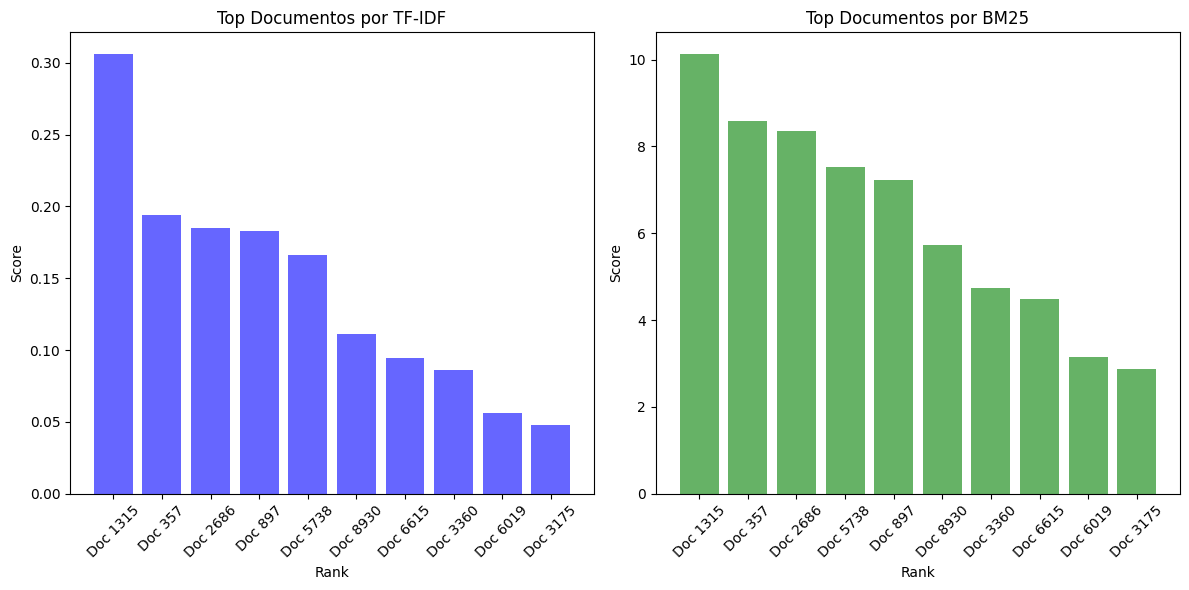


Documentos con alta relevancia en TF-IDF pero baja en BM25:


,Doc_ID,TF-IDF_Score,BM25_Score



Documentos con alta relevancia en BM25 pero baja en TF-IDF:


,Doc_ID,TF-IDF_Score,BM25_Score
0,1315,0.305890,10.121177
1,357,0.193942,8.577244
2,2686,0.185006,8.355575
3,5738,0.165998,7.528653
4,897,0.183039,7.236306
5,8930,0.111464,5.727982
6,3360,0.086052,4.741034
7,6615,0.094337,4.478350
8,6019,0.055941,3.155966
9,3175,0.048060,2.862567



Análisis de diferencias:

Los documentos que tienen alto score en TF-IDF pero bajo en BM25 suelen ser documentos donde:
- El término de consulta aparece muchas veces (alta frecuencia de término)
- Pero el documento es relativamente largo (BM25 penaliza documentos largos)

Los documentos que tienen alto score en BM25 pero bajo en TF-IDF suelen ser:
- Documentos más cortos donde el término aparece varias veces
- Documentos donde el término es más raro en el corpus (BM25 da más peso a términos raros)



In [ ]:
import matplotlib.pyplot as plt

# Parte 4: Comparación visual
# 1. Gráfico de barras para los scores
top_n = 10  # Número de documentos top a visualizar

# Preparar datos
doc_ids_tfidf = [doc_id for doc_id, _ in relevant_docs[:top_n]]
scores_tfidf = [sim for _, sim in relevant_docs[:top_n]]

doc_ids_bm25 = [doc_id for doc_id, _ in relevant_docs_bm25[:top_n]]
scores_bm25 = [score for _, score in relevant_docs_bm25[:top_n]]

# Crear figura
plt.figure(figsize=(12, 6))

# Gráfico TF-IDF
plt.subplot(1, 2, 1)
plt.bar(range(top_n), scores_tfidf, color='blue', alpha=0.6)
plt.title('Top Documentos por TF-IDF')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.xticks(range(top_n), [f'Doc {i}' for i in doc_ids_tfidf], rotation=45)

# Gráfico BM25
plt.subplot(1, 2, 2)
plt.bar(range(top_n), scores_bm25, color='green', alpha=0.6)
plt.title('Top Documentos por BM25')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.xticks(range(top_n), [f'Doc {i}' for i in doc_ids_bm25], rotation=45)

plt.tight_layout()
plt.show()

# 3. Identificar diferencias
# Vamos a encontrar documentos que tienen alto score en un modelo pero no en otro

# Documentos con alta relevancia en TF-IDF pero baja en BM25
high_tfidf_low_bm25 = []
for doc_id, score in relevant_docs[:20]:
    bm25_score = next((s for d, s in relevant_docs_bm25 if d == doc_id), 0)
    if bm25_score < score * 0.5:  # Si el score BM25 es menos de la mitad del TF-IDF
        high_tfidf_low_bm25.append((doc_id, score, bm25_score))

# Documentos con alta relevancia en BM25 pero baja en TF-IDF
high_bm25_low_tfidf = []
for doc_id, score in relevant_docs_bm25[:20]:
    tfidf_score = next((s for d, s in relevant_docs if d == doc_id), 0)
    if tfidf_score < score * 0.5:  # Si el score TF-IDF es menos de la mitad del BM25
        high_bm25_low_tfidf.append((doc_id, tfidf_score, score))

print("\nDocumentos con alta relevancia en TF-IDF pero baja en BM25:")
display(pd.DataFrame(high_tfidf_low_bm25, columns=['Doc_ID', 'TF-IDF_Score', 'BM25_Score']))

print("\nDocumentos con alta relevancia en BM25 pero baja en TF-IDF:")
display(pd.DataFrame(high_bm25_low_tfidf, columns=['Doc_ID', 'TF-IDF_Score', 'BM25_Score']))

# 4. Sugerir posibles razones para las diferencias
print("\nAnálisis de diferencias:")
print("""
Los documentos que tienen alto score en TF-IDF pero bajo en BM25 suelen ser documentos donde:
- El término de consulta aparece muchas veces (alta frecuencia de término)
- Pero el documento es relativamente largo (BM25 penaliza documentos largos)

Los documentos que tienen alto score en BM25 pero bajo en TF-IDF suelen ser:
- Documentos más cortos donde el término aparece varias veces
- Documentos donde el término es más raro en el corpus (BM25 da más peso a términos raros)
""")

## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [ ]:
# Parte 5: Evaluación con consulta relevante
# 1. Elegir una consulta y definir documentos relevantes
new_query = "car engine"
relevant_doc_ids = [5192, 5065, 1327]  # Estos son ejemplos, debes definir los IDs reales que consideres relevantes

# 2. Calcular rankings para la nueva consulta
# Procesar consulta
new_query_processed = ' '.join(preprocess(new_query))
new_query_vector = vectorizer.transform([new_query_processed])

# TF-IDF

new_similarities = cosine_similarity(new_query_vector, sklearn_tfidf).flatten()
new_relevant_docs = [(i, sim) for i, sim in enumerate(new_similarities) if sim > 0.2]
new_relevant_docs.sort(key=lambda x: x[1], reverse=True)

# BM25
new_query_terms = preprocess(new_query)
new_bm25_scores = bm25_docs.get_scores(new_query_terms)
new_relevant_docs_bm25 = [(i, score) for i, score in enumerate(new_bm25_scores) if score > 0]
new_relevant_docs_bm25.sort(key=lambda x: x[1], reverse=True)

# 2. Calcular Precision@3
def precision_at_k(retrieved_docs, relevant_docs, k):
    retrieved_at_k = [doc_id for doc_id, _ in retrieved_docs[:k]]
    relevant_retrieved = len(set(retrieved_at_k) & set(relevant_docs))
    return relevant_retrieved / k

# Precision@3 para TF-IDF
p_at_3_tfidf = precision_at_k(new_relevant_docs, relevant_doc_ids, 3)

# Precision@3 para BM25
p_at_3_bm25 = precision_at_k(new_relevant_docs_bm25, relevant_doc_ids, 3)

print(f"\nEvaluación para consulta: '{new_query}'")
print(f"Documentos considerados relevantes: {relevant_doc_ids}")
print(f"Precision@3 TF-IDF: {p_at_3_tfidf:.2f}")
print(f"Precision@3 BM25: {p_at_3_bm25:.2f}")

# 3. Comparar resultados
print("\nComparación de modelos:")
if p_at_3_tfidf > p_at_3_bm25:
    print("TF-IDF obtuvo mejores resultados según Precision@3")
elif p_at_3_bm25 > p_at_3_tfidf:
    print("BM25 obtuvo mejores resultados según Precision@3")
else:
    print("Ambos modelos obtuvieron el mismo Precision@3")

# Mostrar rankings para inspección
print("\nTop 5 documentos según TF-IDF:")
for rank, (doc_id, score) in enumerate(new_relevant_docs[:5], 1):
    print(f"{rank}. Doc {doc_id} - Score: {score:.4f} - Texto: {docs[doc_id][:100]}...")

print("\nTop 5 documentos según BM25:")
for rank, (doc_id, score) in enumerate(new_relevant_docs_bm25[:5], 1):
    print(f"{rank}. Doc {doc_id} - Score: {score:.4f} - Texto: {docs[doc_id][:100]}...")


Evaluación para consulta: 'car engine'
Documentos considerados relevantes: [5192, 5065, 1327]
Precision@3 TF-IDF: 0.33
Precision@3 BM25: 0.67

Comparación de modelos:
BM25 obtuvo mejores resultados según Precision@3

Top 5 documentos según TF-IDF:
1. Doc 8472 - Score: 0.7273 - Texto: 




	Then what is a "Flat-" engine???

...
2. Doc 6085 - Score: 0.4104 - Texto: I bought a car with a defunct engine, to use for parts
for my old but still running version of the s...
3. Doc 5192 - Score: 0.4015 - Texto: 
Primarily milage.  Gas is much more expensive, so people are very
concerned about it taking a few m...
4. Doc 1327 - Score: 0.3999 - Texto: 
I have had my Probe looked at twice by my local dealer (where I purchased
the car) ... the first ti...
5. Doc 8148 - Score: 0.3818 - Texto: Let's see. These aren't, in a strict sense, amateur rockets. That term
denotes rockets, the engines ...

Top 5 documentos según BM25:
1. Doc 5192 - Score: 11.9911 - Texto: 
Primarily milage.  Gas is much more e